# PD4 - *Sensitive analysis*


In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Cifar10 Model
Source: Christian Versloot at https://www.machinecurve.com/index.php/2020/02/09/how-to-build-a-convnet-for-cifar-10-and-cifar-100-classification-with-keras/

In [2]:
(input_train, target_train), (input_test, target_test) = cifar10.load_data()
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

input_train = input_train / 255
input_test = input_test / 255
def train_model(input_train=input_train, target_train=target_train):
  batch_size = 50
  img_width, img_height, img_num_channels = 32, 32, 3
  loss_function = sparse_categorical_crossentropy
  no_classes = 10
  no_epochs = 100
  optimizer = Adam()
  validation_split = 0.2
  verbosity = 1

  input_shape = (img_width, img_height, img_num_channels)

  model_ = Sequential()
  model_.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model_.add(MaxPooling2D(pool_size=(2, 2)))
  model_.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model_.add(MaxPooling2D(pool_size=(2, 2)))
  model_.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
  model_.add(MaxPooling2D(pool_size=(2, 2)))
  model_.add(Flatten())
  model_.add(Dense(256, activation='relu'))
  model_.add(Dense(128, activation='relu'))
  model_.add(Dense(no_classes, activation='softmax'))
  # Compile the model
  model_.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

  # Fit data to model
  history_ = model_.fit(input_train, target_train,
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity,
              validation_split=validation_split)
  return model_, history_

In [3]:
img_width, img_height, img_num_channels = 32, 32, 3

## Perturbacja Danych Testowych

In [4]:
#My Code
#model, history = train_model()
#mode.save('./model.keras')

In [5]:
model = load_model("./model.keras")

In [6]:
def perturb(data, fraction=0.1):
  noise = np.random.random(np.prod(data.shape))*fraction
  noise = noise.reshape(data.shape)
  data_perturbed = (data + noise)/(1+fraction)
  return data_perturbed, noise

In [7]:
def print_mean_var(arr, fraction = 0.1):
  print()
  print(f"Fraction = {fraction}")
  print(f"Mean accuracy is equal to: {np.mean(arr)}")
  print(f"Accuracy variance is equal to: {np.var(arr)}")
  print(f"Accuracy standard deviance is equal to: {np.std(arr)}")

In [8]:
cifar10 = {0:"Airplane",
          1:"Automobile",
          2:"Bird",
          3:"Cat",
          4:"Dee",
          5:"Dog",
          6:"Frog",
          7:"Horse",
          8:"Ship",
          9:"Truck"}

In [9]:
def get_predictions(predic_arr, threshold = 1.0e-2):
  global cifar10
  predic_arr = predic_arr[0]
  indices = np.nonzero(predic_arr > threshold)
  for i in indices[0]:
    print(f"{cifar10[i]} with prob. of: {predic_arr[i]}")

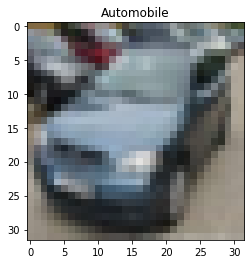

In [10]:
i = np.random.randint(0,10000)
plt.imshow(input_test[i])
plt.title(cifar10[target_test[i][0]])
plt.show()

In [11]:
index = 6
photo = input_test[index]
test_len = input_test.shape[0]
print(input_test.shape)
print(photo.shape)

(10000, 32, 32, 3)
(32, 32, 3)


In [12]:
photo_perturbed, photo_noise = perturb(photo, fraction=0.1)

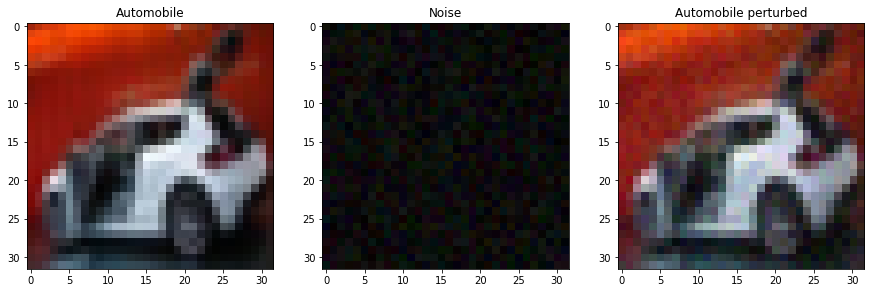

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (15,15))
name_photo = cifar10[target_test[index][0]]
ax1.imshow(photo)
ax1.set_title(name_photo)
ax2.imshow(photo_noise)
ax2.set_title('Noise')
ax3.imshow(photo_perturbed)
ax3.set_title(f'{name_photo} perturbed')
plt.show()

In [14]:
get_predictions(model.predict(photo.reshape(1,32,32,3)))

Automobile with prob. of: 1.0


In [15]:
get_predictions(model.predict(photo_perturbed.reshape(1,32,32,3)))

Automobile with prob. of: 0.9999934434890747


In [16]:
input_test_perturbed, noise = perturb(input_test)

In [17]:
score_org = model.evaluate(input_test, target_test, verbose=0)
print(f'Original loss: {score_org[0]} / Test accuracy: {score_org[1]}')
score = model.evaluate(input_test_perturbed, target_test, verbose=0)
print(f'Noise-Test loss: {score[0]} / Test accuracy: {score[1]}')

Original loss: 3.2502965927124023 / Test accuracy: 0.6865000128746033
Noise-Test loss: 3.1293702125549316 / Test accuracy: 0.6748999953269958


In [18]:
for frac in range(1,6):
  frac = frac/10
  res = []
  for i in range(5):
    input_test_perturbed, noise = perturb(input_test, fraction=frac)
    acc = model.evaluate(input_test_perturbed, target_test, verbose=0)[1]
    res.append(acc)
  print_mean_var(res, fraction = frac)


Fraction = 0.1
Mean accuracy is equal to: 0.6732599973678589
Accuracy variance is equal to: 1.5904109284292647e-06
Accuracy standard deviance is equal to: 0.0012611149544864118

Fraction = 0.2
Mean accuracy is equal to: 0.6388200044631958
Accuracy variance is equal to: 8.621613176842401e-06
Accuracy standard deviance is equal to: 0.002936258363435071

Fraction = 0.3
Mean accuracy is equal to: 0.5798799991607666
Accuracy variance is equal to: 1.9615872560052596e-06
Accuracy standard deviance is equal to: 0.0014005667624234339

Fraction = 0.4
Mean accuracy is equal to: 0.500979995727539
Accuracy variance is equal to: 1.271354023600679e-05
Accuracy standard deviance is equal to: 0.003565605171076404

Fraction = 0.5
Mean accuracy is equal to: 0.4283600032329559
Accuracy variance is equal to: 8.47443847241891e-06
Accuracy standard deviance is equal to: 0.0029110888808861384


## Modyfikacja wag jednej warstwy

https://keras.io/api/layers/base_layer/

In [19]:
def perturb_test_reset(layer, model, to_perturb = True, perturb_fraction=0.1, reset=True, verbose=False):
  global input_test, input_train
  prev_weights = layer.get_weights()
  conv_weights = prev_weights[0]
  bias_weights = prev_weights[1]
  if to_perturb:
    (bias_perturbed, _), (conv_perturbed, _)  = (perturb(bias_weights, fraction=perturb_fraction), 
                                                perturb(conv_weights, fraction=perturb_fraction))
    layer.set_weights([conv_perturbed, bias_perturbed])

  score = model.evaluate(input_test, target_test, verbose=0)
  name = layer.get_config()['name']
  if verbose:
    print(f'{"Noise-" if to_perturb else "Org-"}Test loss for {name}: {score[0]} / Test accuracy: {score[1]}')
  if reset:
    layer.set_weights(prev_weights)
  return score, name

In [31]:
def reload_model():
  model = load_model('model.keras')
  layers_conv = model.layers[0:5:2]
  layers_dens = model.layers[-3:]
  layers_to_perturb = layers_conv + layers_dens
  return model, layers_to_perturb

In [20]:
print(model.summary())
model.layers

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [38]:
model, layers_to_perturb = reload_model()

In [39]:
first = model.layers[0]
all_weights = first.get_weights()
print(all_weights[0].shape)
print(f'Original loss: {score_org[0]} / Test accuracy: {score_org[1]}')
tmp = perturb_test_reset(first, model, verbose = 1)

(3, 3, 3, 32)
Original loss: 3.2502965927124023 / Test accuracy: 0.6865000128746033
Noise-Test loss for conv2d: 15.44432544708252 / Test accuracy: 0.15129999816417694


In [40]:
last = model.layers[-1]
all_weights = last.get_weights()
print(all_weights[0].shape)
print(f'Original loss: {score_org[0]} / Test accuracy: {score_org[1]}')
tmp = perturb_test_reset(last, model, verbose = True)

(128, 10)
Original loss: 3.2502965927124023 / Test accuracy: 0.6865000128746033
Noise-Test loss for dense_2: 2.995616912841797 / Test accuracy: 0.6804999709129333


Najpierw badam dla jak wpływają różne perturbacje dla kolejnych warstw oddzielnie.

In [41]:
for layer_ in layers_to_perturb:
  tmp = perturb_test_reset(layer_, model, verbose = True)

Noise-Test loss for conv2d: 17.170639038085938 / Test accuracy: 0.14390000700950623
Noise-Test loss for conv2d_1: 4.800327301025391 / Test accuracy: 0.5077000260353088
Noise-Test loss for conv2d_2: 5.180874347686768 / Test accuracy: 0.47110000252723694
Noise-Test loss for dense: 5.395436763763428 / Test accuracy: 0.6449000239372253
Noise-Test loss for dense_1: 6.2662224769592285 / Test accuracy: 0.6807000041007996
Noise-Test loss for dense_2: 3.060359239578247 / Test accuracy: 0.6798999905586243


In [25]:
for layer_ in layers_to_perturb:
  tmp = perturb_test_reset(layer_, model, verbose = True, perturb_fraction=0.01)

Noise-Test loss for conv2d: 3.7470953464508057 / Test accuracy: 0.656000018119812
Noise-Test loss for conv2d_1: 3.3526711463928223 / Test accuracy: 0.6890000104904175
Noise-Test loss for conv2d_2: 3.389786720275879 / Test accuracy: 0.683899998664856
Noise-Test loss for dense: 3.4541289806365967 / Test accuracy: 0.6908000111579895
Noise-Test loss for dense_1: 3.524454355239868 / Test accuracy: 0.6863999962806702
Noise-Test loss for dense_2: 3.220364809036255 / Test accuracy: 0.6858999729156494


In [26]:
for layer_ in layers_to_perturb:
  tmp = perturb_test_reset(layer_, model, verbose = True, perturb_fraction=0.5)

Noise-Test loss for conv2d: 35.39017868041992 / Test accuracy: 0.11389999836683273
Noise-Test loss for conv2d_1: 5.092393398284912 / Test accuracy: 0.11829999834299088
Noise-Test loss for conv2d_2: 53.33842468261719 / Test accuracy: 0.11749999970197678
Noise-Test loss for dense: 42.70233917236328 / Test accuracy: 0.2623000144958496
Noise-Test loss for dense_1: 29.112707138061523 / Test accuracy: 0.4083000123500824
Noise-Test loss for dense_2: 4.032018661499023 / Test accuracy: 0.5781000256538391


In [27]:
res = []
for i in range(5):
  accuracy = perturb_test_reset(model.layers[2], model, verbose = True)[0][1]
  res.append(accuracy)
print_mean_var(res)

Noise-Test loss for conv2d_1: 4.790613651275635 / Test accuracy: 0.5074999928474426
Noise-Test loss for conv2d_1: 4.862574577331543 / Test accuracy: 0.498199999332428
Noise-Test loss for conv2d_1: 4.679265022277832 / Test accuracy: 0.5153999924659729
Noise-Test loss for conv2d_1: 4.68638801574707 / Test accuracy: 0.5142999887466431
Noise-Test loss for conv2d_1: 4.712646007537842 / Test accuracy: 0.5139999985694885

Fraction = 0.1
Mean accuracy is equal to: 0.5098799943923951
Accuracy variance is equal to: 4.181357103959727e-05
Accuracy standard deviance is equal to: 0.006466341395224758


In [28]:
res = []
frac = 0.01
for i in range(5):
  accuracy = perturb_test_reset(model.layers[2], model, verbose = True, perturb_fraction=frac)[0][1]
  res.append(accuracy)
print_mean_var(res, fraction = frac)

Noise-Test loss for conv2d_1: 3.3647007942199707 / Test accuracy: 0.6876999735832214
Noise-Test loss for conv2d_1: 3.36139178276062 / Test accuracy: 0.6883000135421753
Noise-Test loss for conv2d_1: 3.3624844551086426 / Test accuracy: 0.6884999871253967
Noise-Test loss for conv2d_1: 3.3538007736206055 / Test accuracy: 0.6888999938964844
Noise-Test loss for conv2d_1: 3.356595277786255 / Test accuracy: 0.6884999871253967

Fraction = 0.01
Mean accuracy is equal to: 0.688379991054535
Accuracy variance is equal to: 1.5360424669097485e-07
Accuracy standard deviance is equal to: 0.00039192377663389453


In [29]:
res = []
frac = 0.05
for i in range(5):
  accuracy = perturb_test_reset(model.layers[-1], model, verbose = True, perturb_fraction=frac)[0][1]
  res.append(accuracy)
print_mean_var(res, fraction = frac)

Noise-Test loss for dense_2: 3.125653028488159 / Test accuracy: 0.6830999851226807
Noise-Test loss for dense_2: 3.139719247817993 / Test accuracy: 0.6845999956130981
Noise-Test loss for dense_2: 3.0971479415893555 / Test accuracy: 0.6830999851226807
Noise-Test loss for dense_2: 3.1046931743621826 / Test accuracy: 0.6863999962806702
Noise-Test loss for dense_2: 3.1400206089019775 / Test accuracy: 0.6851999759674072

Fraction = 0.05
Mean accuracy is equal to: 0.6844799876213074
Accuracy variance is equal to: 1.6056064362146574e-06
Accuracy standard deviance is equal to: 0.0012671252646106687


In [30]:
res = []
frac = 0.5
for i in range(5):
  accuracy = perturb_test_reset(model.layers[-2], model, verbose = True, perturb_fraction=frac)[0][1]
  res.append(accuracy)
print_mean_var(res, fraction = frac)

Noise-Test loss for dense_1: 28.808237075805664 / Test accuracy: 0.4025000035762787
Noise-Test loss for dense_1: 29.09221839904785 / Test accuracy: 0.39730000495910645
Noise-Test loss for dense_1: 26.815881729125977 / Test accuracy: 0.41670000553131104
Noise-Test loss for dense_1: 27.025115966796875 / Test accuracy: 0.40790000557899475
Noise-Test loss for dense_1: 30.309499740600586 / Test accuracy: 0.38019999861717224

Fraction = 0.5
Mean accuracy is equal to: 0.40092000365257263
Accuracy variance is equal to: 0.00014852965703049392
Accuracy standard deviance is equal to: 0.012187274388906402


## Modyfikacja wag wszystkich warstw

In [32]:
model, layers_to_perturb = reload_model()
res = []
for i in range(5):
  for layer_ in layers_to_perturb:
    perturb_test_reset(layer_, model, reset=False)
  acc = model.evaluate(input_test, target_test, verbose=0)[1]
  res.append(acc)
  model, layers_to_perturb = reload_model()
print_mean_var(res)


Fraction = 0.1
Mean accuracy is equal to: 0.15864000022411345
Accuracy variance is equal to: 0.0006038305942913348
Accuracy standard deviance is equal to: 0.024572964702927785


In [33]:
model, layers_to_perturb = reload_model()
res = []
frac = 0.01
for i in range(5):
  for layer_ in layers_to_perturb:
    perturb_test_reset(layer_, model, reset=False, perturb_fraction=frac)
  acc = model.evaluate(input_test, target_test, verbose=0)[1]
  res.append(acc)
  model, layers_to_perturb = reload_model()
print_mean_var(res, fraction = frac)


Fraction = 0.01
Mean accuracy is equal to: 0.6762799978256225
Accuracy variance is equal to: 7.241643465647485e-06
Accuracy standard deviance is equal to: 0.0026910301866845503


In [34]:
model, layers_to_perturb = reload_model()
res = []
frac = 0.05
for i in range(5):
  for layer_ in layers_to_perturb:
    perturb_test_reset(layer_, model, reset=False, perturb_fraction=frac)
  acc = model.evaluate(input_test, target_test, verbose=0)[1]
  res.append(acc)
  model, layers_to_perturb = reload_model()
print_mean_var(res, fraction = frac)


Fraction = 0.05
Mean accuracy is equal to: 0.31546000242233274
Accuracy variance is equal to: 0.0003181985330788706
Accuracy standard deviance is equal to: 0.017838120222682396


In [37]:
#increasing perturbation for each layer
model, layers_to_perturb = reload_model()
res = []
fracs = [0.02*(i+1) for i in range(len(layers_to_perturb))]
for i in range(5):
  for layer_, frac in zip(layers_to_perturb, fracs):
    perturb_test_reset(layer_, model, reset=False, perturb_fraction=frac)
  acc = model.evaluate(input_test, target_test, verbose=0)[1]
  res.append(acc)
  model, layers_to_perturb = reload_model()
print_mean_var(res, fraction = fracs)


Fraction = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12]
Mean accuracy is equal to: 0.5378599882125854
Accuracy variance is equal to: 0.0003807381677452781
Accuracy standard deviance is equal to: 0.019512513106857303


In [35]:
model, layers_to_perturb = reload_model()

## Zjawisko Niepewności

Predykcje sieci neuronowej oczywiście wprost zależą od wag wyliczonych w trakcie trenowania oraz danych wejściowych. Zjawisko niepewności oznacza wpływ małych zmian w danych na końcowy wynik. Znając metodę działania sieci neuronowych (DNN, CNN i RNN), możemy postawić hipoteze że zmiany w pierwszej warstwie będą miały największy wpływ na wynik końcowy. Podstawą tego jest że kolejne warstwy korzystają z wyników poprzednich, więc zmiana pierwszej nakładałaby na siebie coraz to większe zmiany kolejnych warstw. W powyższym badaniu założenie to potwierdziło się na prostym modelu. Najprostsze metody odnoszą się do perturbacji danych testowych, wag jednej lub wielu warstw. (Shu, Hai, and Hongtu Zhu. "Sensitivity analysis of deep neural networks." Proceedings of the AAAI Conference on Artificial Intelligence. Vol. 33. No. 01. 2019. [https://arxiv.org/abs/1901.07152])